# **Exploratory Data Analysis Citra USG Payudara**

Proses untuk menelusuri dan menganalisa data.

## **Persiapan Data**

Mengimpor Libray dan Package yang dibutuhkan

In [ ]:
pip install matplotlib=='3.5.2'

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib 
from google.colab import drive

In [ ]:
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.5.2


Menghubungkan Google Colab dengan Google Drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path_dataset = '/content/drive/MyDrive/Dataset_Skripsi/Dataset_Breast_Ultrasound'
os.listdir(path_dataset)

['normal', 'malignant', 'benign']

## **Eksplorasi Data**

In [ ]:
list = []
totalFile = 0
totalDir = 0
for base, dirs, files in os.walk(path_dataset):
    list.append(len(files))
    for directories in dirs:
        totalDir += 1
    for Files in files:
        totalFile += 1

print('Jumlah direktori data :', totalDir)
print('Jumlah total data :',totalFile)

Jumlah direktori data : 3
Jumlah total data : 780


In [ ]:
index = np.arange(1,4,1)
d = {'Kelas': os.listdir(path_dataset), 'Total_Gambar': np.delete(list, [0])}
data1 = pd.DataFrame(data=d, index=index)
data1

,Kelas,Total_Gambar
1,normal,133
2,malignant,210
3,benign,437


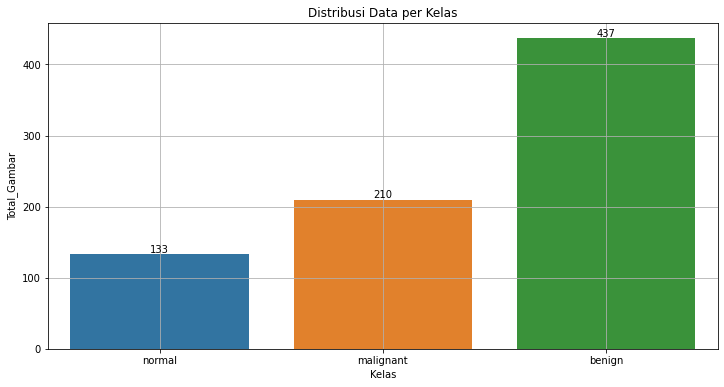

In [ ]:
fig, ax = plt.subplots(figsize=(12,6))
sns.barplot(data=data1,x='Kelas', y='Total_Gambar')
plt.title('Distribusi Data per Kelas')
ax.bar_label(ax.containers[0])
ax.grid()
plt.show()

In [ ]:
from tqdm import tqdm

filenames = []
folder = []
image = []
for path, subdirs, files in tqdm(os.walk(path_dataset)):
    for name in files:
        filenames += [os.path.join(path, name)]
        folder += [os.path.basename(os.path.dirname(filenames[-1]))]
        image += [os.path.basename(filenames[-1])]

data2 = pd.DataFrame({'Path Gambar':filenames, 'Kelas':folder, 'Nama Gambar':image})

4it [00:00, 227.82it/s]


In [ ]:
extension = []
for i in range (sum(data1['Total_Gambar'])) :
    strValue = data2['Nama Gambar'][i]
    ch = '.'
    newCh = strValue[strValue.find(ch):]
    extension.append(newCh)

In [ ]:
data2['Ekstensi'] = extension
data2

,Path Gambar,Kelas,Nama Gambar,Ekstensi
0,/content/drive/MyDrive/Dataset_Skripsi/Dataset...,normal,normal (123).png,.png
1,/content/drive/MyDrive/Dataset_Skripsi/Dataset...,normal,normal (111).png,.png
2,/content/drive/MyDrive/Dataset_Skripsi/Dataset...,normal,normal (108).png,.png
3,/content/drive/MyDrive/Dataset_Skripsi/Dataset...,normal,normal (105).png,.png
4,/content/drive/MyDrive/Dataset_Skripsi/Dataset...,normal,normal (122).png,.png
...,...,...,...,...
775,/content/drive/MyDrive/Dataset_Skripsi/Dataset...,benign,benign (92).png,.png
776,/content/drive/MyDrive/Dataset_Skripsi/Dataset...,benign,benign (9).png,.png
777,/content/drive/MyDrive/Dataset_Skripsi/Dataset...,benign,benign (96).png,.png
778,/content/drive/MyDrive/Dataset_Skripsi/Dataset...,benign,benign (90).png,.png


In [ ]:
data2['Ekstensi'].unique()

array(['.png'], dtype=object)

In [ ]:
data2.groupby('Kelas').apply(lambda df: df.sample(5))['Kelas'].unique()

array(['benign', 'malignant', 'normal'], dtype=object)

In [ ]:
from PIL import Image

total_img = 0
usg_payudara = os.path.join(path_dataset)
list_data_images = ['normal', 'malignant', 'benign']

for data in list_data_images:
  dir = os.path.join(usg_payudara, data)
  total = len(os.listdir(dir))
  print(data+' : ', total)
  total_img = total_img + total

  img_name = os.listdir(dir)
  for i in range(5):
    img_path = os.path.join(dir, img_name[i])
    img = Image.open(img_path)
    print('-',img.size)
  print('...................')

print('\nTotal Images :', total_img)

normal :  133
- (685, 558)
- (913, 663)
- (770, 589)
- (562, 463)
- (766, 578)
...................
malignant :  210
- (562, 476)
- (577, 450)
- (555, 488)
- (582, 434)
- (449, 598)
...................
benign :  437
- (323, 473)
- (808, 716)
- (882, 581)
- (563, 473)
- (766, 585)
...................

Total Images : 780


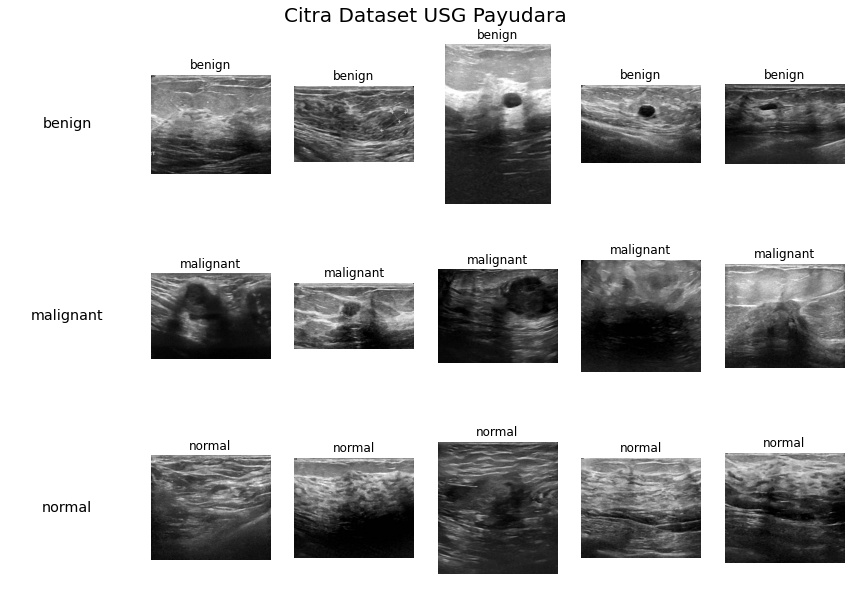

In [ ]:
unique_list = []
unique = data2.groupby('Kelas').apply(lambda df: df.sample(5))['Kelas'].unique()
fig = plt.figure(figsize=(15,10))
plt.title('Citra Dataset USG Payudara', fontsize=20, y=1.03)
plt.axis('off')
columns = 6
rows = 3
img2show = data2.groupby('Kelas').apply(lambda df: df.sample(6))
for i in range(1, columns*rows +1):
    if i % columns == 1 :
        unique_list.append(i)
        fig.add_subplot(rows, columns, i)
        plt.text(0.5,0.5, unique[len(unique_list)-1], ha='center', va='center', fontsize='x-large', fontweight='normal')
        plt.axis('off')
    else :
        fig.add_subplot(rows, columns, i)
        img = mpimg.imread(img2show.iloc[i-1]['Path Gambar'])
        kelas = img2show.iloc[i-1]['Kelas']
        imgplot = plt.imshow(img)
        plt.axis('off')
        plt.title(f'{kelas}')
plt.show()